# Titanic analysis
By Krzysztof Kleszcz

## Introduction 

Explore the poignant story of the Titanic through this dataset. It contains detailed information about the passengers aboard the ill-fated ship, which sank on April 15, 1912, after striking an iceberg.📋

Columns:

* pclass - Ticket class
* survived - Whether the passenger survived the disaster
* name - Passenger's name
* sex - Passenger's gender
* age - Passenger's age
* sibsp - Number of siblings/spouses aboard
* parch - Number of parents/children aboard
* ticket - Ticket number
* fare - Ticket fare
* cabin - Cabin number
* embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat - Lifeboat number
* body - Body number (if the passenger did not survive and the body was recovered)
* home.dest - Destinati

Just in case, please see table of contents:

1. General Data Overview 📊
2. Analysis of Missing Values 📈
3. Single Variable Analysis 🔍
4. Data Transformation 🔄
5. Analysis of Relationships Between Data 🔍
6. Outlier Analysis 📊
7. Analysis Summary 📋

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import plotly.express as px

## 1. General Data Overview 📊
We can observe that we have very diverse data, including both textual and numerical values. 
It's important to note that we also have missing parameters. 📝

In [8]:
df = pd.read_csv('26__titanic.csv', sep=",")
#Wyświetlamy 10 przykładowych danych aby zobaczyć mniej więcej z jakimi danymi mamy do czynienia.
df.sample(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
960,3.0,0.0,"Lemberopolous, Mr. Peter L",male,34.5,0.0,0.0,2683,6.4375,NaN,C,NaN,196.0,NaN
902,3.0,0.0,"Johnston, Mr. Andrew G",male,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN
887,3.0,1.0,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0.0,0.0,65306,8.1125,NaN,S,13,NaN,NaN
487,2.0,0.0,"Lingane, Mr. John",male,61.0,0.0,0.0,235509,12.3500,NaN,Q,NaN,NaN,NaN


We have 1,309 records and 14 columns, though not all columns are well-filled, such as "cabin" and "body."

In [3]:
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The most unique values that can be grouped are pclass, survived, sex, and embarked. 📊

In [5]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [6]:
unikaty = []
for i in df.columns:
    unikaty.append(df[i].nunique() < 5)

for col in df[df.columns[unikaty]]:
    print("Unique values: ",col, df[col].unique())

Unique values:  pclass [ 1.  2.  3. nan]
Unique values:  survived [ 1.  0. nan]
Unique values:  sex ['female' 'male' nan]
Unique values:  embarked ['S' 'C' nan 'Q']


## 2. Analysis of Missing Values 🔎

The majority of missing values pertain to information about cabins, lifeboats, bodies, and future home destinations.

In [7]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

## 3. Single Value Analysis 📉

* The majority of passengers traveled in third class.
* Only around 450 passengers survived, while over 800 were lost.
* Most passengers were between 20 and 40 years old.
* Most passengers traveled without family or spouse.

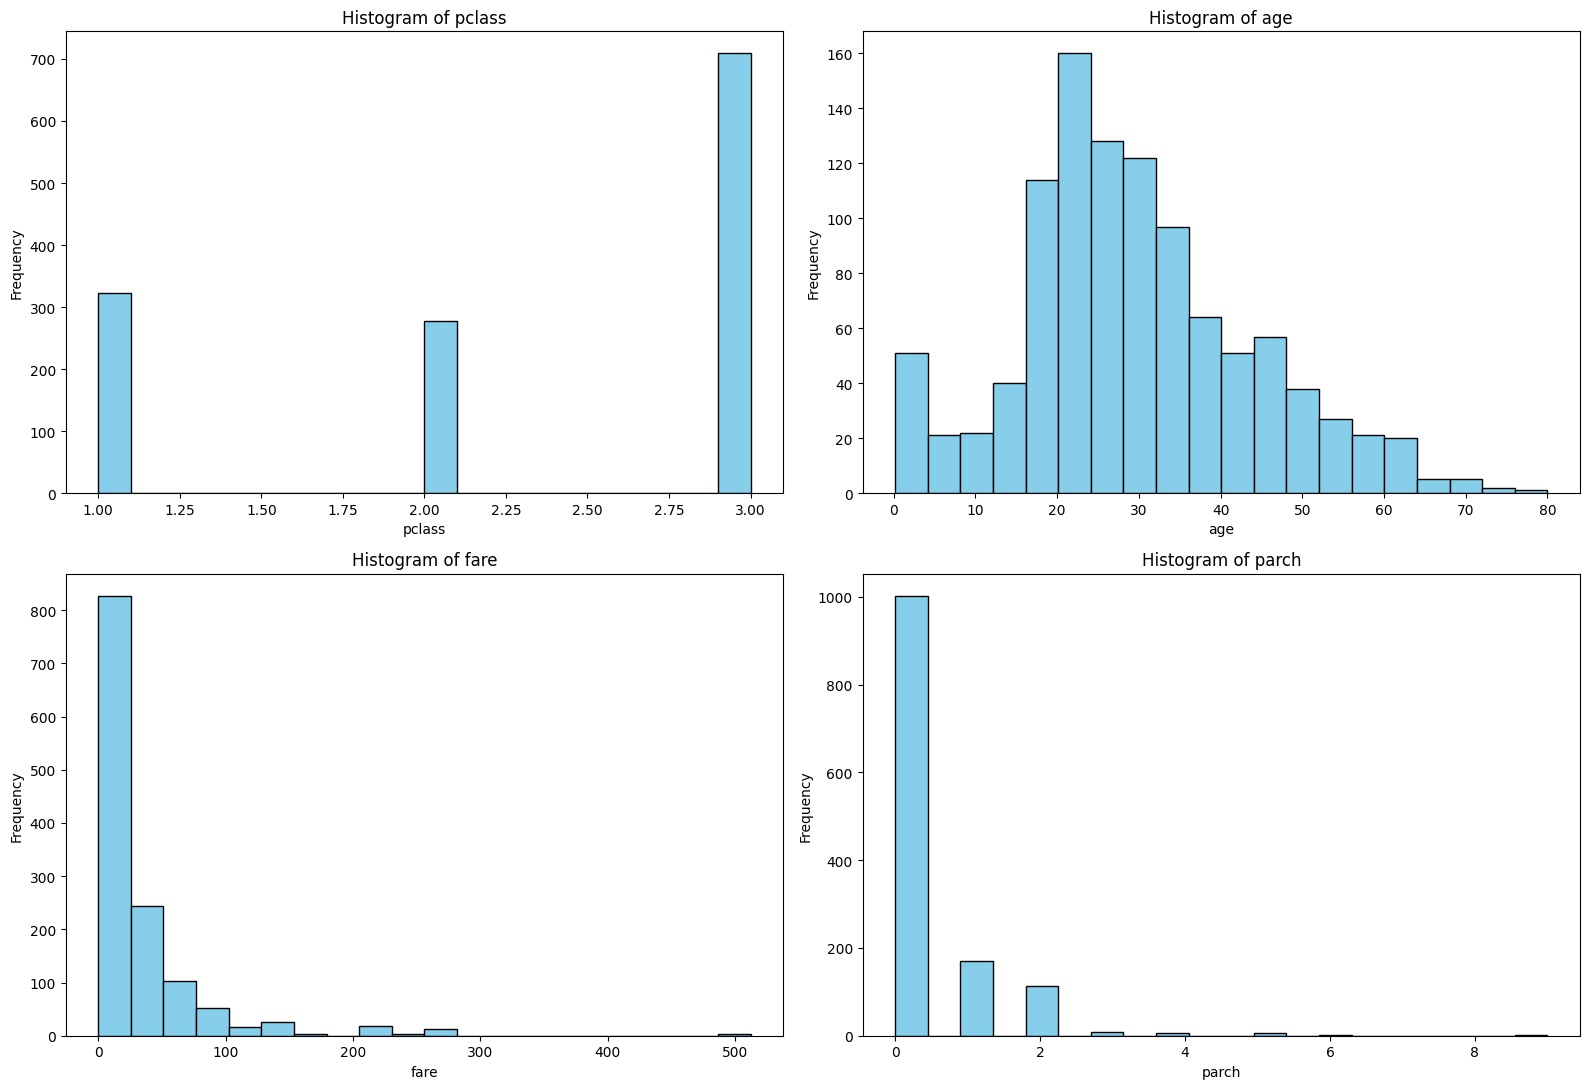

In [8]:
columns = ['pclass', 'age', 'fare', 'parch']

fig, axs = plt.subplots(2, 2, figsize=(16, 11)) 

for ax, col in zip(axs.flatten(), columns):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

fig.tight_layout()

plt.show()

## 4. Data Transformation 🔄

* We will combine data about family and children into one table: family.
* We will remove tables with the most missing data, such as cabin, ticket, and body.
* These data points won't be particularly necessary for our analysis.
* We will replace the missing data with the median, the most frequent value, or the value "Unknown".

In [9]:
#uDeleting columns with most missing values
df.drop(columns=['boat', 'ticket', 'body',])
df.sample(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1092,3.0,0.0,"Oreskovic, Mr. Luka",male,20.0,0.0,0.0,315094,8.6625,NaN,S,NaN,NaN,NaN
699,3.0,0.0,"Cacic, Mr. Luka",male,38.0,0.0,0.0,315089,8.6625,NaN,S,NaN,NaN,Croatia
845,3.0,1.0,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1.0,0.0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
519,2.0,0.0,"Norman, Mr. Robert Douglas",male,28.0,0.0,0.0,218629,13.5000,NaN,S,NaN,287.0,Glasgow
909,3.0,1.0,"Jussila, Mr. Eiriik",male,32.0,0.0,0.0,STON/O 2. 3101286,7.9250,NaN,S,15,NaN,NaN
229,1.0,1.0,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1.0,0.0,PC 17758,108.9000,C65,C,8,NaN,"Madrid, Spain"


In [27]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['pclass'] = df['pclass'].fillna(df['pclass'].mode()[0])
df['survived'] = df['survived'].fillna(df['survived'].mode()[0])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['family'] = df['family'].fillna(df['family'].mode()[0])
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode()[0])
df['name'] = df['name'].fillna('Unknown')
df['boat'] = df['boat'].fillna('Unknown')
df['cabin'] = df['cabin'].fillna('Unknown')
df['ticket'] = df['ticket'].fillna(df['ticket'].mode()[0])

# Sprawdzenie brakujących wartości
missing_values = df.isnull().sum()
sample_data = df.sample(6)

print(missing_values)
print(sample_data)

df


pclass          0
survived        0
name            0
sex             0
age             0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body         1189
home.dest       0
family          0
dtype: int64
     pclass  survived                                               name  \
418     2.0       0.0                               Gilbert, Mr. William   
301     1.0       0.0                       Walker, Mr. William Anderson   
511     2.0       0.0                          Myles, Mr. Thomas Francis   
624     3.0       0.0                  Andersson, Miss. Ellis Anna Maria   
940     3.0       0.0                                Kraeff, Mr. Theodor   
50      1.0       1.0  Cardeza, Mrs. James Warburton Martinez (Charlo...   

        sex   age      ticket      fare        cabin embarked     boat  body  \
418    male  47.0  C.A. 30769   10.5000      Unknown        S  Unknown   NaN   
301    male  47.0       36967   34.0208          D46        

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,family
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,Unknown,NaN,"Montreal, PQ / Chesterville, ON",3.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON",3.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,Unknown,NaN,"Montreal, PQ / Chesterville, ON",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,2665,14.4542,Unknown,C,Unknown,NaN,"New York, NY",1.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,2656,7.2250,Unknown,C,Unknown,304.0,"New York, NY",0.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,2670,7.2250,Unknown,C,Unknown,NaN,"New York, NY",0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,315082,7.8750,Unknown,S,Unknown,NaN,"New York, NY",0.0


## 5. Analysis of Relationships Between Data 🔍

We can observe that nearly every woman in first and second class survived. On the other hand, far fewer men survived compared to women.

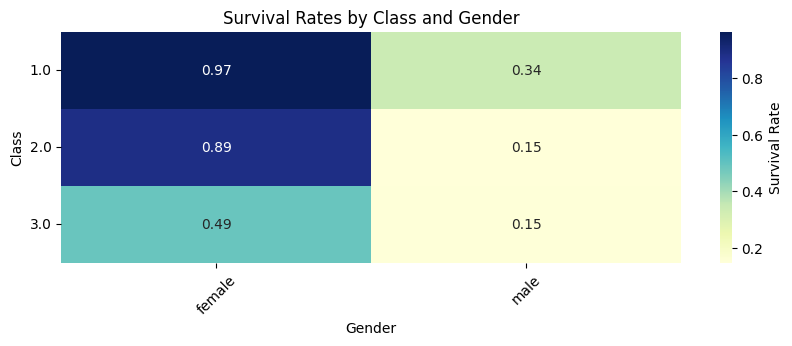

In [28]:
survival_rates = df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

pivot_table = survival_rates.pivot(index='pclass', columns='sex', values='survived')

plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rates by Class and Gender')
plt.xlabel('Gender')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

The highest chances of survival were for those who embarked from port C. 🚢

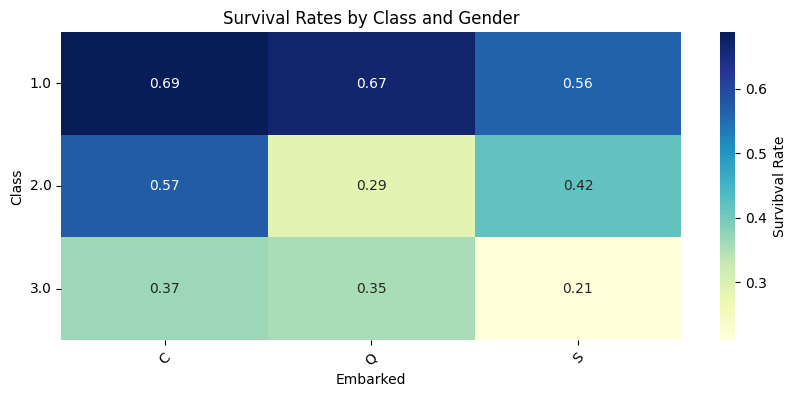

In [20]:
survival_rates = df.groupby(['pclass', 'embarked'])['survived'].mean().reset_index()

pivot_table = survival_rates.pivot(index='pclass', columns='embarked', values='survived')

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Survibval Rate'})
plt.title('Survival Rates by Class and Gender')
plt.xlabel('Embarked')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

## 6. Analysis of Outliers 📊

* We can observe that the more expensive the ticket, the higher the chance of survival.
* The most outliers were found in the first class, specifically regarding ticket prices.

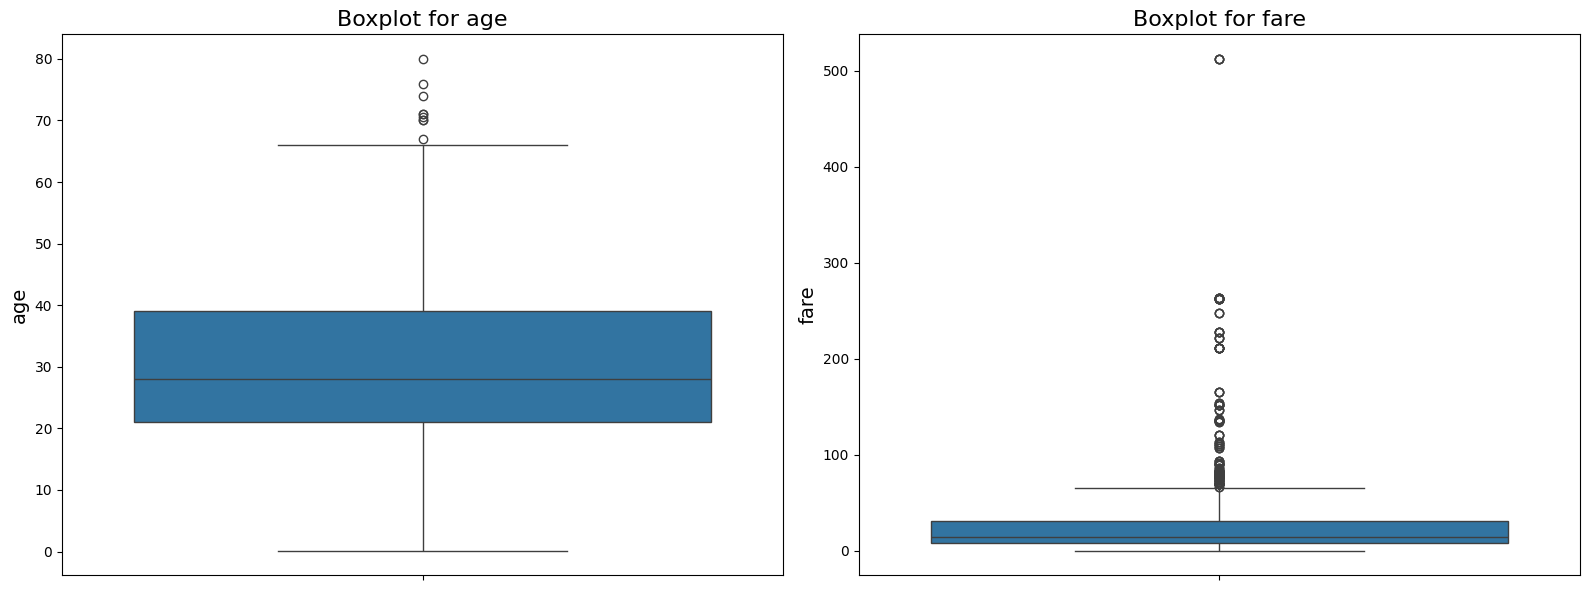

In [10]:
columns = ['age', 'fare']

fig, axs = plt.subplots(1, 2, figsize=(16, 6)) 

for ax, col in zip(axs, columns):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f'Boxplot for {col}', fontsize=16)
    ax.set_ylabel(f'{col}', fontsize=14)

fig.tight_layout()

plt.show()


## 7. Analysis Summary 📋

* The data turned out to be somewhat inconvenient for analysis due to many missing values.
* This led to the necessity of data transformation by calculating averages or transforming columns.
* About 33% of the passengers survived.
* We can observe that nearly every woman in first and second class survived.
* The highest chances of survival were for those who embarked from port C.
* We can observe that the more expensive the ticket, the higher the chance of survival.
* The most outliers were found in the first class, specifically regarding ticket prices.

## Thank you for your attention! 🎉 Your interest and time mean a lot.

In [12]:
!jupyter nbconvert titanic.ipynb --to html --no-input --no-prompt --output titanic2.html

[NbConvertApp] Converting notebook titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 476807 bytes to titanic2.html
